In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [8]:
np.random.seed(42)
data=np.random.normal(loc=50,scale=10,size=100)
outliers=np.array([10,110,5,120])
data=np.concatenate([data,outliers])
data

array([ 54.96714153,  48.61735699,  56.47688538,  65.23029856,
        47.65846625,  47.65863043,  65.79212816,  57.67434729,
        45.30525614,  55.42560044,  45.36582307,  45.34270246,
        52.41962272,  30.86719755,  32.75082167,  44.37712471,
        39.8716888 ,  53.14247333,  40.91975924,  35.87696299,
        64.65648769,  47.742237  ,  50.67528205,  35.75251814,
        44.55617275,  51.1092259 ,  38.49006423,  53.75698018,
        43.9936131 ,  47.0830625 ,  43.98293388,  68.52278185,
        49.86502775,  39.42289071,  58.22544912,  37.7915635 ,
        52.08863595,  30.40329876,  36.71813951,  51.96861236,
        57.3846658 ,  51.71368281,  48.84351718,  46.98896304,
        35.2147801 ,  42.80155792,  45.39361229,  60.57122226,
        53.4361829 ,  32.36959845,  53.24083969,  46.1491772 ,
        43.23078   ,  56.11676289,  60.30999522,  59.31280119,
        41.60782477,  46.90787624,  53.31263431,  59.75545127,
        45.20825762,  48.14341023,  38.93665026,  38.03

In [12]:
df=pd.DataFrame(data,columns=['Values'])
df.head()

,Values
0,54.967142
1,48.617357
2,56.476885
3,65.230299
4,47.658466


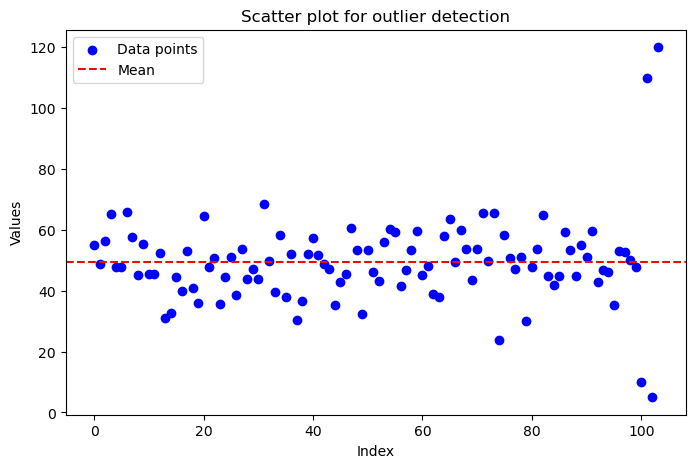

In [22]:
plt.figure(figsize=(8,5))
plt.scatter(range(len(df)),df['Values'],color='blue',label='Data points')
plt.axhline(y=df['Values'].mean(),color='red',linestyle='--',label='Mean')
plt.xlabel("Index")
plt.ylabel("Values")
plt.title("Scatter plot for outlier detection")
plt.legend()
plt.show()


***Using Scatter Plot***

**<ins>A scatter plot helps visually identify extreme values.</ins>**

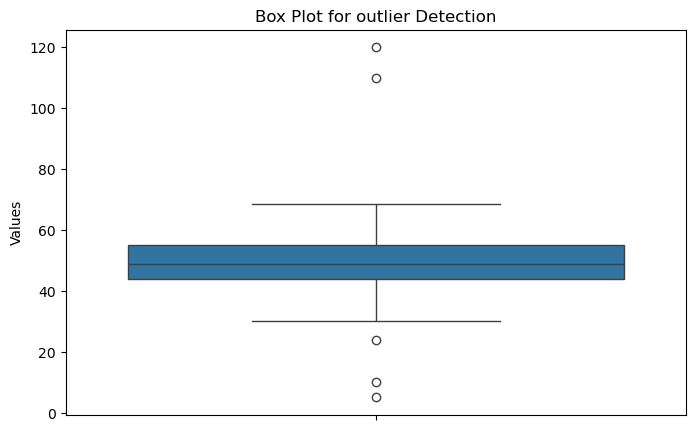

In [35]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df,y='Values')
plt.title("Box Plot for outlier Detection")
plt.show()

***Using Box Plot***


In [43]:
df['Z-score']=zscore(df['Values'])
df['Outlier_Z']=df['Z-score'].apply(lambda x:'Outlier' if abs(x) > 3 else 'Normal')
(df[df['Outlier_Z']=='Outlier'])

,Values,Z-score,Outlier_Z
101,110.0,4.328173,Outlier
102,5.0,-3.175368,Outlier
103,120.0,5.042796,Outlier


# Z-Score Method

The **Z-Score** is a statistical measure that describes a data point's relationship to the mean of a group of data points. Specifically, the Z-score tells you how many standard deviations a data point is from the mean. It's useful for identifying **outliers** or extreme values in a dataset.

## Formula

The Z-score is calculated using the following formula:

\[
Z = \frac{(X - \μ)}{\σ}
\]

Where:
- \( X \) is the value from the dataset.
- \( \μ \) (μ) is the mean of the dataset.
- \( \σ \) (σ) is the standard deviation of the dataset.

## Interpretation

- **Z = 0**: The data point is exactly at the mean.
- **Z > 0**: The data point is above the mean.
- **Z < 0**: The data point is below the mean.
- **Z > 3 or Z < -3**: Typically indicates an **outlier** (though this threshold can vary depending on the data and the context).

## When to Use Z-Score?

The Z-Score is commonly used for:
- **Identifying outliers**: Any data points with a Z-score above 3 or below -3 can be considered as potential outliers.
- **Standardizing data**: The Z-score is often used in machine learning to normalize data, ensuring that each feature contributes equally to the analysis.



In [61]:
Q1=df['Values'].quantile(0.25)
Q3=df['Values'].quantile(0.75)
IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
df['Outlier_IQR']=df['Values'].apply(lambda x:'Outlier' if(x < lower_bound or x > upper_bound) else 'Normal')
df[df['Outlier_IQR']=='Outlier']

,Values,Z-score,Outlier_Z,Outlier_IQR
74,23.802549,-1.831694,Normal,Outlier
100,10.000000,-2.818056,Normal,Outlier
101,110.000000,4.328173,Outlier,Outlier
102,5.000000,-3.175368,Outlier,Outlier
103,120.000000,5.042796,Outlier,Outlier


 **Summary**
1. **Scatter Plot** – Outliers appear far from the main cluster.
2. 
3. **Box Plot** – Outliers are outside the whiskers.
4. 
5. **Z-Score** – Values with \( Z > 3 \) or \( Z < -3 \) are outliers.
6. 
7. **IQR** – Values outside the range \( [Q1 - 1.5 \times IQR, Q3 + 1.5 \times IQR] \) are outliers.

**Finding Outliers Using the IQR Method with a 5-Number Summary**
The 5-number summary consists of:
 
Minimum (Q0) → The smallest value in the dataset.
 
First Quartile (Q1) → The 25th percentile (lower quartile).
 
Median (Q2) → The 50th percentile (middle value).
 
Third Quartile (Q3) → The 75th percentile (upper quartile).
 
Maximum (Q4) → The largest value in the dataset.


***The Interquartile Range (IQR) is calculated as:***
 
IQR=Q3−Q1
 
Any value outside the range:
 
[Q1−1.5×IQR,Q3+1.5×IQR]  is considered an outlier.

In [76]:
import numpy as np

np.random.seed(42)
data = np.random.normal(loc=50, scale=10, size=100)
outliers = np.array([10, 110, 5, 120])
data = np.concatenate([data, outliers])

min_value = np.min(data)
Q1 = np.percentile(data, 25)
Q3 = np.median(data)
Q3 = np.percentile(data, 75)
max_value = np.max(data)

IQR=Q3-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

outliers=data[(data <lower_bound)|(data > upper_bound)]

print(f"5-number summary:\nMin: {min_value},Q1: {Q1}, Median (Q2):{Q3},Max:{max_value}")
print(f"IQR: {IQR}")
print(f"Lower Bound:{lower_bound},Upper Bound:{upper_bound}")
print(f"Outliers:{outliers}")

5-number summary:
Min: 5.0,Q1: 43.874401021766715, Median (Q2):55.00852473036764,Max:120.0
IQR: 11.134123708600924
Lower Bound:27.17321545886533,Upper Bound:71.70971029326903
Outliers:[ 23.80254896  10.         110.           5.         120.        ]
